In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates

#data check
#another way to check the era5 data
ds_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/era5/2021.h5')
ds_era

#phony_dim_0: 1460(timestep); phony_dim_1: 20(variable); phony_dim_2: 721(longitude); phony_dim_3: 144(latitude)


#fcn-based on ECMWF initial conditions plots


ds_fcn_ecmwf = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210704_00_backtransformed.nc')
ds_fcn_ecmwf

ds_fcn_ecmwf.forecast[50,0,2,::-1,:]
ds_era.fields[709,2,260:40:-1,720:1200]

ds_ecmwf = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210614_00_sfc.nc')
ds_ecmwf

lon_ec = ds_ecmwf['longitude']
lat_ec = ds_ecmwf['latitude']

lat_ec

<xarray.DataArray 'latitude' (latitude: 221)>
array([80.  , 79.75, 79.5 , ..., 25.5 , 25.25, 25.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 80.0 79.75 79.5 79.25 ... 25.75 25.5 25.25 25.0
Attributes:
    units:      degrees_north
    long_name:  latitude

In [2]:
#fcn_era5
ds_fcn_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/2021_dt_list_ens_backtransformed.nc',engine = 'netcdf4')
ds_fcn_era

<xarray.Dataset>
Dimensions:      (phony_dim_3: 21, phony_dim_0: 21, phony_dim_1: 51,
                  phony_dim_2: 57, phony_dim_4: 220, phony_dim_5: 480)
Coordinates:
  * phony_dim_3  (phony_dim_3) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 0
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 20
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
  * phony_dim_2  (phony_dim_2) int64 0 1 2 3 4 5 6 7 ... 49 50 51 52 53 54 55 56
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 214 215 216 217 218 219
  * phony_dim_5  (phony_dim_5) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479
Data variables:
    forecast     (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3, phony_dim_4, phony_dim_5) float64 ...

In [3]:
mean_fcn_era = ds_fcn_era.forecast[:,:,:,2,79:159,194:274]
mean_fcn_era 

<xarray.DataArray 'forecast' (phony_dim_0: 21, phony_dim_1: 51,
                              phony_dim_2: 57, phony_dim_4: 80, phony_dim_5: 80)>
[390700800 values with dtype=float64]
Coordinates:
    phony_dim_3  int64 2
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 20
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
  * phony_dim_2  (phony_dim_2) int64 0 1 2 3 4 5 6 7 ... 49 50 51 52 53 54 55 56
  * phony_dim_4  (phony_dim_4) int64 79 80 81 82 83 84 ... 154 155 156 157 158
  * phony_dim_5  (phony_dim_5) int64 194 195 196 197 198 ... 269 270 271 272 273

In [7]:
#mean_fcn_era
start_index = 56
step_size = 1
num_iterations =15
fcn_era_values=[]
for i in range(num_iterations):
    fcn_era_value = mean_fcn_era[(i+1) * step_size, :,start_index - i * step_size*4, :, :]
    fcn_era_values.append(fcn_era_value)
data_array_fcn_era_values=xr.DataArray(fcn_era_values)

#data_array_fcn_era_values

In [5]:
data_array_fcn_era_values

<xarray.DataArray (dim_0: 15, dim_1: 51, dim_2: 80, dim_3: 80)>
array([[[[290.03897176, 289.79708483, 289.73746772, ..., 295.92997669,
          296.01004081, 295.87793207],
         [291.88411286, 291.50705754, 291.20462769, ..., 296.3638934 ,
          295.81447252, 295.60694275],
         [291.6750405 , 290.90261158, 290.39990903, ..., 296.29987709,
          295.87592593, 295.91526843],
         ...,
         [287.88553372, 288.01810537, 288.11701134, ..., 298.95156676,
          301.44580856, 298.35961094],
         [288.0738162 , 288.10959081, 288.13373404, ..., 300.7090955 ,
          301.60693286, 298.40762796],
         [288.18624348, 288.24196708, 288.3186919 , ..., 301.83740997,
          301.55424464, 298.95013782]],

        [[286.11813199, 285.96317296, 285.45248993, ..., 281.00408944,
          280.14855573, 281.46833348],
         [275.56611235, 275.09430954, 275.56407397, ..., 283.13158993,
          280.22469434, 280.88751261],
         [276.61731906, 276.139279  , 276.64790929, ..., 283.57843862,
          281.86768152, 282.17190426],
...
         [288.8058472 , 288.71975701, 288.61761453, ..., 302.54424934,
          304.85098188, 301.14859134],
         [288.97204558, 288.93200713, 288.83389289, ..., 303.33920293,
          304.85501203, 300.33761548],
         [289.08016944, 289.04013035, 288.95001192, ..., 303.78973443,
          304.38442938, 299.76290911]],

        [[300.05728122, 299.90908763, 299.96716343, ..., 300.25149591,
          300.60391317, 300.64596669],
         [300.55587827, 300.20544416, 300.20346101, ..., 301.26470974,
          301.22265621, 301.13656729],
         [300.66601529, 299.83700591, 299.75289886, ..., 301.48898327,
          301.60311979, 301.93551527],
         ...,
         [288.8058472 , 288.71975701, 288.61761453, ..., 302.54424934,
          304.85098188, 301.14859134],
         [288.97204558, 288.93200713, 288.83389289, ..., 303.33920293,
          304.85501203, 300.33761548],
         [289.08016944, 289.04013035, 288.95001192, ..., 303.78973443,
          304.38442938, 299.76290911]]]])
Dimensions without coordinates: dim_0, dim_1, dim_2, dim_3

In [63]:
#np.set_printoptions(threshold=np.inf)
data_array_fcn_era_values_array = np.array(data_array_fcn_era_values)
indices_fcn_era = np.where(data_array_fcn_era_values_array >= 323)
#indices_fcn_era

In [84]:
def make_plots_outliers(dates,member):
    contour1 = plt.contourf(data_array_fcn_era_values_array[dates,member,:,:],cmap='jet',levels=20)
    plt.colorbar()
    plt.title(f'fcn_gauss, time = 2021-06-{15 + dates}, member index = {member}')
    plt.savefig(f'/home/kit/imk-tro/gj5173/checking_outlier_grids_new/2021-06-{15 + dates}_{member}.png', bbox_inches='tight',dpi=100)

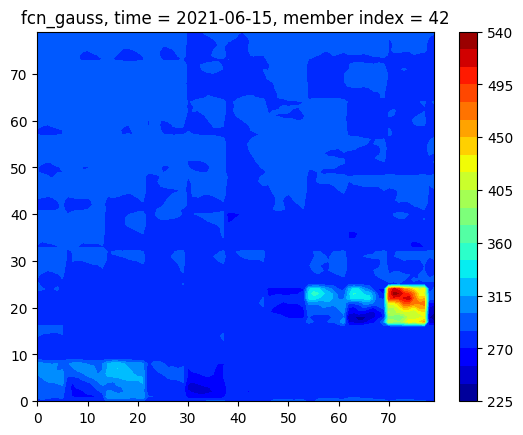

In [96]:
make_plots_outliers(0,42)

In [3]:
ds_fcn_ec_1 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210614_00_backtransformed.nc') 
variable_data_fcn_ec_1 = ds_fcn_ec_1['forecast'][:,:,2,79:159,194:274]

In [6]:
ds_fcn_ec_2 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210615_00_backtransformed.nc') 
variable_data_fcn_ec_2 = ds_fcn_ec_2['forecast'][:,:,2,79:159,194:274]

In [7]:
ds_fcn_ec_3 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210616_00_backtransformed.nc') 
variable_data_fcn_ec_3 = ds_fcn_ec_3['forecast'][:,:,2,79:159,194:274]

In [8]:
ds_fcn_ec_4 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210617_00_backtransformed.nc') 
variable_data_fcn_ec_4 = ds_fcn_ec_4['forecast'][:,:,2,79:159,194:274]

In [9]:
ds_fcn_ec_5 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210618_00_backtransformed.nc') 
variable_data_fcn_ec_5 = ds_fcn_ec_5['forecast'][:,:,2,79:159,194:274]

In [10]:
ds_fcn_ec_6 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210619_00_backtransformed.nc') 
variable_data_fcn_ec_6 = ds_fcn_ec_6['forecast'][:,:,2,79:159,194:274]

In [11]:
ds_fcn_ec_7 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210620_00_backtransformed.nc') 
variable_data_fcn_ec_7 = ds_fcn_ec_7['forecast'][:,:,2,79:159,194:274]

In [12]:
ds_fcn_ec_8 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210621_00_backtransformed.nc') 
variable_data_fcn_ec_8 = ds_fcn_ec_8['forecast'][:,:,2,79:159,194:274]

In [13]:
ds_fcn_ec_9 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210622_00_backtransformed.nc') 
variable_data_fcn_ec_9 = ds_fcn_ec_9['forecast'][:,:,2,79:159,194:274]

In [14]:
ds_fcn_ec_10 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210623_00_backtransformed.nc') 
variable_data_fcn_ec_10 = ds_fcn_ec_10['forecast'][:,:,2,79:159,194:274]

In [15]:
ds_fcn_ec_11 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210624_00_backtransformed.nc') 
variable_data_fcn_ec_11 = ds_fcn_ec_11['forecast'][:,:,2,79:159,194:274]

In [16]:
ds_fcn_ec_12 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210625_00_backtransformed.nc') 
variable_data_fcn_ec_12 = ds_fcn_ec_12['forecast'][:,:,2,79:159,194:274]

In [17]:
ds_fcn_ec_13 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210626_00_backtransformed.nc') 
variable_data_fcn_ec_13 = ds_fcn_ec_13['forecast'][:,:,2,79:159,194:274]

In [18]:
ds_fcn_ec_14 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210627_00_backtransformed.nc') 
variable_data_fcn_ec_14 = ds_fcn_ec_14['forecast'][:,:,2,79:159,194:274]

In [98]:
ds_fcn_ec_15 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210628_00_backtransformed.nc') 
variable_data_fcn_ec_15 = ds_fcn_ec_15['forecast'][:,:,2,79:159,194:274]

In [99]:
ds_fcn_ec_16 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210629_00_backtransformed.nc') 
variable_data_fcn_ec_16 = ds_fcn_ec_16['forecast'][:,:,2,79:159,194:274]

In [2]:
#fcn_ecmwf
directory_fcn_ec = '/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/'
filename_pattern_fcn_ec = r'\d{8}_00_backtransformed\.nc'
#fc_cf_20210615_00_sfc.nc
#20210704_00_backtransformed.nc
files_fcn_ec = sorted([f for f in os.listdir(directory_fcn_ec) if re.match(filename_pattern_fcn_ec, f)])
files_fcn_ec

data_fcn_ec = []
for file1 in files_fcn_ec[0:5]:
    file_path_fcn_ec = os.path.join(directory_fcn_ec, file1)
    # Extract the date from the filename
    date_str = re.search(r'\d{8}', file1).group(0)
    
    date = datetime.datetime.strptime(date_str, '%Y%m%d').date()
    # Read the file and extract the desired variable
    ds_fcn_ec = xr.open_dataset(file_path_fcn_ec)
    variable_data_fcn_ec =  ds_fcn_ec['forecast'][:,:,2,79:159,194:274]
    data_fcn_ec.append(variable_data_fcn_ec)

data_array_fcn_ec =xr.DataArray(data_fcn_ec)    

In [ ]:
data_array_fcn_ec_0_unmean = data_array_fcn_ec[:,:,:,:]
%store data_array_fcn_ec_0_unmean

In [ ]:
#fcn_ecmwf
directory_fcn_ec = '/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/'
filename_pattern_fcn_ec = r'\d{8}_00_backtransformed\.nc'
#fc_cf_20210615_00_sfc.nc
#20210704_00_backtransformed.nc
files_fcn_ec = sorted([f for f in os.listdir(directory_fcn_ec) if re.match(filename_pattern_fcn_ec, f)])
files_fcn_ec

data_fcn_ec = []
for file1 in files_fcn_ec[5:10]:
    file_path_fcn_ec = os.path.join(directory_fcn_ec, file1)
    # Extract the date from the filename
    date_str = re.search(r'\d{8}', file1).group(0)
    
    date = datetime.datetime.strptime(date_str, '%Y%m%d').date()
    # Read the file and extract the desired variable
    ds_fcn_ec = xr.open_dataset(file_path_fcn_ec)
    variable_data_fcn_ec =  ds_fcn_ec['forecast'][:,:,2,79:159,194:274]
    data_fcn_ec.append(variable_data_fcn_ec)

data_array_fcn_ec_1_unmean =xr.DataArray(data_fcn_ec)    
%store data_array_fcn_ec_1_unmean

In [ ]:
new_dimension = 'time'
ds_fcn_ec_1_expanded = ds_fcn_ec_1.expand_dims(**{new_dimension: [0]})
ds_fcn_ec_2_expanded = ds_fcn_ec_2.expand_dims(**{new_dimension: [1]})

In [4]:
ds_fcn_ec_1

<xarray.Dataset>
Dimensions:      (phony_dim_2: 21, phony_dim_0: 51, phony_dim_1: 57,
                  phony_dim_3: 220, phony_dim_4: 480)
Coordinates:
  * phony_dim_2  (phony_dim_2) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 0
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 49 50 51 52 53 54 55 56
  * phony_dim_3  (phony_dim_3) int64 0 1 2 3 4 5 6 ... 214 215 216 217 218 219
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479
Data variables:
    forecast     (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3, phony_dim_4) float64 ...

In [8]:
ds_fcn_ec = xr.concat([ds_fcn_ec_1, ds_fcn_ec_2],dim = phony_dim_1)

NameError: name 'phony_dim_1' is not defined

In [3]:
ds_fcn_ec_4 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210617_00_backtransformed.nc') 
variable_data_fcn_ec_4 = ds_fcn_ec_4['forecast'][:,:,2,79:159,194:274]

In [6]:
variable_data_fcn_ec_4[:,48,:,:]

<xarray.DataArray 'forecast' (phony_dim_0: 51, phony_dim_3: 80, phony_dim_4: 80)>
[326400 values with dtype=float64]
Coordinates:
    phony_dim_2  int64 2
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
    phony_dim_1  int64 48
  * phony_dim_3  (phony_dim_3) int64 79 80 81 82 83 84 ... 154 155 156 157 158
  * phony_dim_4  (phony_dim_4) int64 194 195 196 197 198 ... 269 270 271 272 273

In [13]:
#np.set_printoptions(threshold=np.inf)
data_array_fcn_ec_values_array = np.array(variable_data_fcn_ec_4)
indices_fcn_ec = np.where(data_array_fcn_ec_values_array >= 323)
#indices_fcn_ec

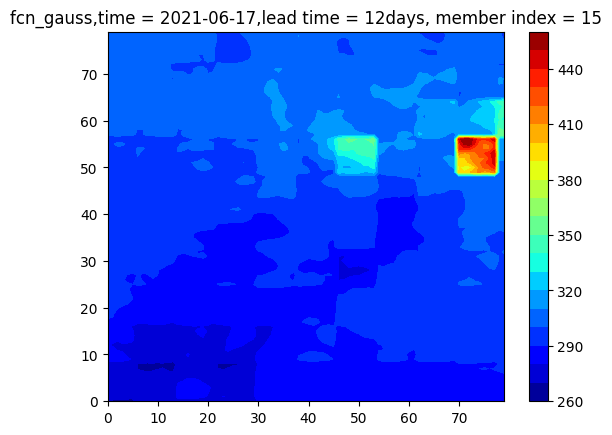

In [32]:
contour1 = plt.contourf(data_array_fcn_ec_values_array[15,:,:],cmap='jet',levels=20)
plt.colorbar()
plt.title('fcn_gauss,time = 2021-06-17,lead time = 12days, member index = 15')
plt.savefig('/home/kit/imk-tro/gj5173/checking_outliers_grids/fc_ec_15.png', bbox_inches='tight',dpi=100)

In [ ]:
#ECMWF
directory = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/
filename_pattern = r'fc_pf_\d{8}_\d{2}_sfc\.nc'

files = sorted([f for f in os.listdir(directory) if re.match(filename_pattern, f)])
files

data_ec = []
for file in files:
    file_path = os.path.join(directory, file)
    # Extract the date from the filename
    #date_str = re.search(r'\d{8}_\d{2}', file).group(0)
    #date = datetime.datetime.strptime(date_str, '%Y%m%d_%H').date()
    # Read the file and extract the desired variable
    ds = xr.open_dataset(file_path)
    variable_data = ds['t2m'] 

    #time_coord = xr.DataArray([date], dims='time1', coords={'time1': [date]})
    #variable_data = variable_data.expand_dims(dim='time1')
    #variable_data = variable_data.assign_coords(time=time_coord)

    data_ec.append(variable_data)

#combined_data = xr.concat(data, dim='time1')
#combined_data
#combined_data[0,:,119,234]
np.shape(data_ec)

#ds_ecmwf.t2m[0,79:159,194:274]
data_array_ec =xr.DataArray(data_ec)
#data_array_ec[:,0,0,0]
mean_ecmwf = data_array_ec[:,:,79:159,194:274]
mean_ecmwf